In [1]:
import sys
from pathlib import Path
CWD = Path.cwd()
for p in [CWD, CWD.parent, CWD.parent.parent]:
    if (p / "src").exists():
        sys.path.append(str(p / "src"))
        PROJECT_ROOT = p
        break

from utils import get_data_dir, load_local_raw
RAW_DF = load_local_raw(get_data_dir(raw=True))
print("raw shape:", RAW_DF.shape)
RAW_DF.head()

raw shape: (280178, 176)


c:\Users\gwanji\pjt-apt_analysis\src\utils.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["region_group"] = np.where(df[city_col].isin(KOREA_CAPITAL), "ÏàòÎèÑÍ∂å", "ÏßÄÎ∞©")


1   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏÇºÍ∞ÅÎèô    835    0835  0000      ÏùºÍ≥°ÏóòÎ¶¨Ï≤¥ÌîÑÎùºÏûÑ   84.9426    202508  \
0  2   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÎßàÎ•µÎèô      1     1.0   0.0          ÏÉÅÎ¨¥ÏûêÏù¥  170.8552  202508.0   
1  3   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô  23-20    23.0  20.0  Ìï¥Í¥ëÏÉπÍ∑∏Î¶¥ÎùºÏÑºÌä∏Îü¥337   54.6212  202508.0   
2  4   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô  859-1   859.0   1.0     ÌòÑÎåÄ(859-1)   60.0000  202508.0   
3  5  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ Ïö∞ÏÇ∞Îèô   1625  1625.0   0.0     ÏåçÏö©ÎçîÌîåÎûòÌã∞ÎÑòÍ¥ëÏÇ∞   84.9784  202508.0   
4  6   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏùºÍ≥°Îèô  816-3   816.0   3.0           ÎèôÏïÑ2   99.8600  202508.0   

   14  41,500  ... Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ ÏÑúÍ∑ÄÌè¨Ïãú Í∞ïÏ†ïÎèô  195 0195 ÏÑúÍ∑ÄÌè¨Í∞ïÏ†ïÏßÄÍµ¨3Î∏îÎü≠Ï§ëÌù•ÏóêÏä§-ÌÅ¥ÎûòÏä§  84.9297  \
0  14  68,000  ...              NaN  NaN  NaN                NaN      NaN   
1  14  17,900  ...              NaN  NaN  NaN                NaN      NaN   
2  14  12,500  ...              NaN  NaN  NaN                NaN      NaN   
3  14  41,300  ...              NaN  NaN  NaN                NaN      NaN   
4  14  30,000  ...              NaN  NaN  NaN                NaN      NaN   

  48,700   7 ÎåÄÏ≤≠Î°ú 12 Ï†úÏ£º ÏÑúÍ∑ÄÌè¨Ïãú region_group  
0    NaN NaN    NaN     NaN           ÏßÄÎ∞©  
1    NaN NaN    NaN     NaN           ÏßÄÎ∞©  
2    NaN NaN    NaN     NaN           ÏßÄÎ∞©  
3    NaN NaN    NaN     NaN           ÏßÄÎ∞©  
4    NaN NaN    NaN     NaN           ÏßÄÎ∞©  

[5 rows x 176 columns]

In [2]:
import pandas as pd
import numpy as np

def ensure_required_cols(df: pd.DataFrame) -> pd.DataFrame:
    """Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú ÌïµÏã¨ Ïª¨ÎüºÎì§ÏùÑ ÏïàÏ†ÑÌïòÍ≤å ÏÉùÏÑ±/Î≥¥Ï†ïÌïúÎã§."""
    out = df.copy()

    # 1) ÏõêÎ≥∏ ÌïúÍ∏Ä Ïª¨ÎüºÏùÑ ÌëúÏ§Ä Ïù¥Î¶ÑÏúºÎ°ú ÎèôÍ∏∞Ìôî (ÏûàÏùÑ ÎïåÎßå)
    col_ko_to_std = {
        "Ï†ÑÏö©Î©¥Ï†Å(„é°)": "area_m2",
        "Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)": "price_manwon",
        "Í≥ÑÏïΩÎÖÑÏõî": "yyyymm",
        "Í≥ÑÏïΩÏùº": "day",
    }
    for ko, std in col_ko_to_std.items():
        if ko in out.columns and std not in out.columns:
            out[std] = out[ko]

    # 2) Ïà´ÏûêÌòï Î≥¥Ï†ï
    if "price_manwon" in out.columns:
        out["price_manwon"] = (
            out["price_manwon"].astype(str).str.replace(",", "", regex=False).str.strip()
        )
        out["price_manwon"] = pd.to_numeric(out["price_manwon"], errors="coerce")

    if "area_m2" in out.columns:
        out["area_m2"] = pd.to_numeric(out["area_m2"], errors="coerce")

    # 3) ÎÇ†Ïßú/Ïõî ÏÉùÏÑ±
    if "month" not in out.columns:
        if "date" in out.columns and pd.api.types.is_datetime64_any_dtype(out["date"]):
            out["month"] = out["date"].dt.to_period("M").dt.to_timestamp()
        else:
            # yyyymm(+day)Î°úÎ∂ÄÌÑ∞ ÏÉùÏÑ± ÏãúÎèÑ
            if "yyyymm" in out.columns:
                yyyymm = out["yyyymm"].astype(str).str.slice(0, 6)
                if "day" in out.columns:
                    day = out["day"].astype(str).str.zfill(2)
                    out["date"] = pd.to_datetime(yyyymm + day, format="%Y%m%d", errors="coerce")
                else:
                    out["date"] = pd.to_datetime(yyyymm + "01", format="%Y%m%d", errors="coerce")
                out["month"] = out["date"].dt.to_period("M").dt.to_timestamp()

    # 4) Îã®ÏúÑÎ©¥Ï†ÅÎãπ Í∞ÄÍ≤©
    if "price_per_m2_manwon" not in out.columns and {"price_manwon","area_m2"}.issubset(out.columns):
        out["price_per_m2_manwon"] = out["price_manwon"] / out["area_m2"]

    return out

RAW_DF = ensure_required_cols(RAW_DF)

print("ÌïÑÏàò Ïª¨Îüº Ïú†Î¨¥:",
      "month" in RAW_DF.columns,
      "price_per_m2_manwon" in RAW_DF.columns)
RAW_DF.head(2)


ÌïÑÏàò Ïª¨Îüº Ïú†Î¨¥: False False


1  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏÇºÍ∞ÅÎèô    835  0835  0000      ÏùºÍ≥°ÏóòÎ¶¨Ï≤¥ÌîÑÎùºÏûÑ   84.9426    202508  14  \
0  2  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÎßàÎ•µÎèô      1   1.0   0.0          ÏÉÅÎ¨¥ÏûêÏù¥  170.8552  202508.0  14   
1  3  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô  23-20  23.0  20.0  Ìï¥Í¥ëÏÉπÍ∑∏Î¶¥ÎùºÏÑºÌä∏Îü¥337   54.6212  202508.0  14   

   41,500  ... Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ ÏÑúÍ∑ÄÌè¨Ïãú Í∞ïÏ†ïÎèô  195 0195 ÏÑúÍ∑ÄÌè¨Í∞ïÏ†ïÏßÄÍµ¨3Î∏îÎü≠Ï§ëÌù•ÏóêÏä§-ÌÅ¥ÎûòÏä§  84.9297 48,700  \
0  68,000  ...              NaN  NaN  NaN                NaN      NaN    NaN   
1  17,900  ...              NaN  NaN  NaN                NaN      NaN    NaN   

    7 ÎåÄÏ≤≠Î°ú 12 Ï†úÏ£º ÏÑúÍ∑ÄÌè¨Ïãú region_group  
0 NaN    NaN     NaN           ÏßÄÎ∞©  
1 NaN    NaN     NaN           ÏßÄÎ∞©  

[2 rows x 176 columns]

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import glob
import pandas as pd

files = glob.glob("data/raw/*.csv")

dfs = []
for f in files:
    try:
        df = pd.read_csv(f, encoding='cp949', sep='\t')
        dfs.append(df)
        print(f"‚úÖ {f} loaded")
    except Exception as e:
        print(f"‚ùå {f} failed: {e}")


‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_5.csv loaded


In [6]:
print(dfs[0].columns)

Index(['‚ñ° Î≥∏ ÏÑúÎπÑÏä§ÏóêÏÑú Ï†úÍ≥µÌïòÎäî Ï†ïÎ≥¥Îäî Î≤ïÏ†ÅÏù∏ Ìö®Î†•Ïù¥ ÏóÜÏúºÎØÄÎ°ú Ï∞∏Í≥†Ïö©ÏúºÎ°úÎßå ÌôúÏö©ÌïòÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.'], dtype='object')


In [7]:
import glob
import pandas as pd

files = glob.glob("data/raw/*.csv")

dfs = []
for f in files:
    try:
        df = pd.read_csv(f, encoding='cp949', sep='\t', skiprows=1)
        dfs.append(df)
        print(f"‚úÖ {f} loaded")
    except Exception as e:
        print(f"‚ùå {f} failed: {e}")


‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_5.csv loaded


In [8]:
with open("data/raw/Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv", encoding='cp949') as f:
    for i in range(20):
        print(f"{i+1:02d}: {f.readline().strip()}")


01: "‚ñ° Î≥∏ ÏÑúÎπÑÏä§ÏóêÏÑú Ï†úÍ≥µÌïòÎäî Ï†ïÎ≥¥Îäî Î≤ïÏ†ÅÏù∏ Ìö®Î†•Ïù¥ ÏóÜÏúºÎØÄÎ°ú Ï∞∏Í≥†Ïö©ÏúºÎ°úÎßå ÌôúÏö©ÌïòÏãúÍ∏∞ Î∞îÎûçÎãàÎã§."
02: "‚ñ° Ïã†Í≥†Ï†ïÎ≥¥Í∞Ä Ïã§ÏãúÍ∞Ñ Î≥ÄÍ≤Ω, Ìï¥Ï†úÎêòÏñ¥ Ï†úÍ≥µÏãúÏ†êÏóê Îî∞Îùº Í≥µÍ∞úÍ±¥Ïàò Î∞è ÎÇ¥Ïö©Ïù¥ ÏÉÅÏù¥Ìï† Ïàò ÏûàÎäî Ï†ê Ï∞∏Í≥†ÌïòÏãúÍ∏∞ Î∞îÎûçÎãàÎã§."
03: "‚ñ° Î≥∏ ÏûêÎ£åÎäî Í≥ÑÏïΩÏùº Í∏∞Ï§ÄÏûÖÎãàÎã§. (‚Äª 7Ïõî Í≥ÑÏïΩ, 8Ïõî Ïã†Í≥†Í±¥ ‚Üí 7Ïõî Í±∞ÎûòÍ±¥ÏúºÎ°ú  Ï†úÍ≥µ)"
04: "‚ñ° ÌÜµÍ≥ÑÏûêÎ£å ÌôúÏö©ÏãúÏóêÎäî ÏàòÏπòÍ∞Ä ÏôúÍ≥°Îê† Ïàò ÏûàÏúºÎãà Ï∞∏Í≥†ÏûêÎ£åÎ°úÎßå ÌôúÏö©ÌïòÏãúÍ∏∞  Î∞îÎùºÎ©∞,  Ïô∏Î∂Ä Í≥µÍ∞úÏãúÏóêÎäî Î∞òÎìúÏãú Ïã†Í≥†Ïùº Í∏∞Ï§ÄÏúºÎ°ú ÏßëÍ≥ÑÎêòÎäî Í≥µÏãùÌÜµÍ≥ÑÎ•º Ïù¥Ïö©ÌïòÏó¨ Ï£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§."
05: ""
06: "* Íµ≠ÌÜ†ÍµêÌÜµÎ∂Ä Ïã§Í±∞ÎûòÍ∞Ä Í≥µÍ∞úÏãúÏä§ÌÖúÏùò Í∂ÅÍ∏àÌïòÏã† Ï†êÏù¥ÎÇò Î¨∏ÏùòÏÇ¨Ìï≠ÏùÄ ÏΩúÏÑºÌÑ∞ 1533-2949Î°ú Ïó∞ÎùΩ Ï£ºÏãúÍ∏∞ Î∞îÎûçÎãàÎã§."
07: "‚ñ° Í≤ÄÏÉâÏ°∞Í±¥"
08: "Í≥ÑÏïΩÏùºÏûê : 2024-08-15 ~ 2025-08-15"
09: "Ïã§Í±∞ÎûòÍµ¨Î∂Ñ : ÏïÑÌååÌä∏(Îß§Îß§)"
10: "Ï£ºÏÜåÍµ¨Î∂Ñ : ÏßÄÎ≤àÏ£ºÏÜå"
11: "ÏãúÎèÑ : Í¥ëÏ£ºÍ¥ëÏó≠Ïãú"
12: "ÏãúÍµ∞

In [9]:
import glob
import pandas as pd

files = glob.glob("data/raw/*.csv")

dfs = []
for f in files:
    try:
        df = pd.read_csv(f, encoding='cp949', sep='\t', skiprows=15)
        dfs.append(df)
        print(f"‚úÖ {f} loaded")
    except Exception as e:
        print(f"‚ùå {f} failed: {e}")


‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_5.csv loaded


In [10]:
print(dfs[0].columns)

Index(['NO,"ÏãúÍµ∞Íµ¨","Î≤àÏßÄ","Î≥∏Î≤à","Î∂ÄÎ≤à","Îã®ÏßÄÎ™Ö","Ï†ÑÏö©Î©¥Ï†Å(„é°)","Í≥ÑÏïΩÎÖÑÏõî","Í≥ÑÏïΩÏùº","Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)","Îèô","Ï∏µ","Îß§ÏàòÏûê","Îß§ÎèÑÏûê","Í±¥Ï∂ïÎÖÑÎèÑ","ÎèÑÎ°úÎ™Ö","Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº","Í±∞ÎûòÏú†Ìòï","Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ","Îì±Í∏∞ÏùºÏûê"'], dtype='object')


In [11]:
column_names = [
    "NO", "ÏãúÍµ∞Íµ¨", "Î≤àÏßÄ", "Î≥∏Î≤à", "Î∂ÄÎ≤à", "Îã®ÏßÄÎ™Ö",
    "Ï†ÑÏö©Î©¥Ï†Å(„é°)", "Í≥ÑÏïΩÎÖÑÏõî", "Í≥ÑÏïΩÏùº", "Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)",
    "Îèô", "Ï∏µ", "Îß§ÏàòÏûê", "Îß§ÎèÑÏûê", "Í±¥Ï∂ïÎÖÑÎèÑ", "ÎèÑÎ°úÎ™Ö",
    "Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº", "Í±∞ÎûòÏú†Ìòï", "Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ", "Îì±Í∏∞ÏùºÏûê"
]

In [12]:
import glob
import pandas as pd

files = glob.glob("data/raw/*.csv")

dfs = []
for f in files:
    try:
        df = pd.read_csv(
            f,
            encoding='cp949',
            # sep='\t',
            skiprows=15,
            # names=column_names
        )
        dfs.append(df)
        print(f"‚úÖ {f} loaded")
    except Exception as e:
        print(f"‚ùå {f} failed: {e}")

dfs[0]


‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_5.csv loaded


NO            ÏãúÍµ∞Íµ¨      Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à           Îã®ÏßÄÎ™Ö   Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  \
0          1   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏÇºÍ∞ÅÎèô     835   835   0      ÏùºÍ≥°ÏóòÎ¶¨Ï≤¥ÌîÑÎùºÏûÑ   84.9426  202508   
1          2   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÎßàÎ•µÎèô       1     1   0          ÏÉÅÎ¨¥ÏûêÏù¥  170.8552  202508   
2          3   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô   23-20    23  20  Ìï¥Í¥ëÏÉπÍ∑∏Î¶¥ÎùºÏÑºÌä∏Îü¥337   54.6212  202508   
3          4   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô   859-1   859   1     ÌòÑÎåÄ(859-1)   60.0000  202508   
4          5  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ Ïö∞ÏÇ∞Îèô    1625  1625   0     ÏåçÏö©ÎçîÌîåÎûòÌã∞ÎÑòÍ¥ëÏÇ∞   84.9784  202508   
...      ...            ...     ...   ...  ..           ...       ...     ...   
15798  15799   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÎÇ®Íµ¨ Ï£ºÏõîÎèô   420-4   420   4         ÏÇºÎã§ÏóêÏΩîÎπå   81.4048  202408   
15799  15800   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÏπòÌèâÎèô    1331  1331   0       ÏÉÅÎ¨¥ÏóêÏä§ÏºÄÏù¥Î∑∞   59.9671  202408   
15800  15801   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÏπòÌèâÎèô  1168-1  1168   1    Ï§ëÌù•(1168-1)   84.9300  202408   
15801  15802   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌíçÏïîÎèô    1101  1101   0          Î™®ÏïÑÏóòÍ∞Ä  109.4500  202408   
15802  15803   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÏåçÏ¥åÎèô    1380  1380   0         ÏÉÅÎ¨¥ÏóòÎ¶¨Ï≤¥   84.9810  202408   

       Í≥ÑÏïΩÏùº Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)         Îèô   Ï∏µ Îß§ÏàòÏûê Îß§ÎèÑÏûê  Í±¥Ï∂ïÎÖÑÎèÑ             ÎèÑÎ°úÎ™Ö Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº  Í±∞ÎûòÏú†Ìòï  \
0       14   41,500         -  17  Í∞úÏù∏  Í∞úÏù∏  2016         ÏÑ§Ï£ΩÎ°ú 419       -  Ï§ëÍ∞úÍ±∞Îûò   
1       14   68,000         -   4  Í∞úÏù∏  Í∞úÏù∏  2008       Î∞±ÏÑùÍ∏∏ 22-23       -  Ï§ëÍ∞úÍ±∞Îûò   
2       14   17,900         -  18  Í∞úÏù∏  Í∞úÏù∏  2017         ÎÇ¥Î∞©Î°ú 337       -  Ï§ëÍ∞úÍ±∞Îûò   
3       14   12,500         -   6  Í∞úÏù∏  Í∞úÏù∏  1987       ÏõîÎìúÏªµ4Í∞ïÎ°ú 22       -  Ï§ëÍ∞úÍ±∞Îûò   
4       14   41,300         -   7  Í∞úÏù∏  Í∞úÏù∏  2021     Ïö∞ÏÇ∞Î°ú107Î≤àÍ∏∏ 67       -  Ï§ëÍ∞úÍ±∞Îûò   
...    ...      ...       ...  ..  ..  ..   ...             ...     ...   ...   
15798   15   14,950  ÏÇºÎã§ÏóêÏΩîÎπåÏïÑÌååÌä∏   5  Í∞úÏù∏  Í∞úÏù∏  2007       Í¥ëÎ≥µÎßàÏùÑ6Í∏∏ 25       -  Ï§ëÍ∞úÍ±∞Îûò   
15799   15   49,700      101Îèô  16  Í∞úÏù∏  Í∞úÏù∏  2016       ÎßàÎ•µÎ≥µÍ∞úÎ°ú 140       -  Ï§ëÍ∞úÍ±∞Îûò   
15800   15   42,500       108  10  Í∞úÏù∏  Í∞úÏù∏  1997          ÏπòÌèâÎ°ú 77       -  Ï§ëÍ∞úÍ±∞Îûò   
15801   15   42,000       101   6  Í∞úÏù∏  Í∞úÏù∏  2000        ÌíçÏïîÏ§ëÏïôÎ°ú 25       -  Ï§ëÍ∞úÍ±∞Îûò   
15802   15   46,500       104  15  Í∞úÏù∏  Í∞úÏù∏  2018  ÏõîÎìúÏªµ4Í∞ïÎ°ú197Î≤àÍ∏∏ 12       -  Ï§ëÍ∞úÍ±∞Îûò   

       Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ      Îì±Í∏∞ÏùºÏûê  
0       Í¥ëÏ£º Î∂ÅÍµ¨         -  
1      Í¥ëÏ£º Í¥ëÏÇ∞Íµ¨         -  
2       Í¥ëÏ£º ÏÑúÍµ¨         -  
3       Í¥ëÏ£º ÏÑúÍµ¨         -  
4      Í¥ëÏ£º Í¥ëÏÇ∞Íµ¨         -  
...       ...       ...  
15798   Í¥ëÏ£º Î∂ÅÍµ¨  24.09.25  
15799   Í¥ëÏ£º ÏÑúÍµ¨  24.10.15  
15800   Í¥ëÏ£º ÏÑúÍµ¨  24.10.31  
15801   Í¥ëÏ£º ÏÑúÍµ¨  24.11.15  
15802   Í¥ëÏ£º ÏÑúÍµ¨  24.10.31  

[15803 rows x 20 columns]

In [13]:
print(dfs[0].head())


   NO            ÏãúÍµ∞Íµ¨     Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à           Îã®ÏßÄÎ™Ö   Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  \
0   1   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏÇºÍ∞ÅÎèô    835   835   0      ÏùºÍ≥°ÏóòÎ¶¨Ï≤¥ÌîÑÎùºÏûÑ   84.9426  202508   14   
1   2   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÎßàÎ•µÎèô      1     1   0          ÏÉÅÎ¨¥ÏûêÏù¥  170.8552  202508   14   
2   3   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô  23-20    23  20  Ìï¥Í¥ëÏÉπÍ∑∏Î¶¥ÎùºÏÑºÌä∏Îü¥337   54.6212  202508   14   
3   4   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô  859-1   859   1     ÌòÑÎåÄ(859-1)   60.0000  202508   14   
4   5  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ Ïö∞ÏÇ∞Îèô   1625  1625   0     ÏåçÏö©ÎçîÌîåÎûòÌã∞ÎÑòÍ¥ëÏÇ∞   84.9784  202508   14   

  Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)  Îèô   Ï∏µ Îß§ÏàòÏûê Îß§ÎèÑÏûê  Í±¥Ï∂ïÎÖÑÎèÑ          ÎèÑÎ°úÎ™Ö Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº  Í±∞ÎûòÏú†Ìòï  Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ Îì±Í∏∞ÏùºÏûê  
0   41,500  -  17  Í∞úÏù∏  Í∞úÏù∏  2016      ÏÑ§Ï£ΩÎ°ú 419       -  Ï§ëÍ∞úÍ±∞Îûò   Í¥ëÏ£º Î∂ÅÍµ¨    -  
1   68,000  -   4  Í∞úÏù∏  Í∞úÏù∏  2008    Î∞±ÏÑùÍ∏∏ 22

In [14]:
import glob
import pandas as pd

files = glob.glob("data/raw/*.csv")

dfs = []
for f in files:
    try:
        df = pd.read_csv(
            f,
            encoding='cp949',
            sep='\t',
            skiprows=15,
            header=0,
            quotechar='"'
        )
        dfs.append(df)
        print(f"‚úÖ {f} loaded")
    except Exception as e:
        print(f"‚ùå {f} failed: {e}")


‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_5.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_1.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_2.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_3.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_4.csv loaded
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_5.csv loaded


In [15]:
print(dfs[0].columns)


Index(['NO,"ÏãúÍµ∞Íµ¨","Î≤àÏßÄ","Î≥∏Î≤à","Î∂ÄÎ≤à","Îã®ÏßÄÎ™Ö","Ï†ÑÏö©Î©¥Ï†Å(„é°)","Í≥ÑÏïΩÎÖÑÏõî","Í≥ÑÏïΩÏùº","Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)","Îèô","Ï∏µ","Îß§ÏàòÏûê","Îß§ÎèÑÏûê","Í±¥Ï∂ïÎÖÑÎèÑ","ÎèÑÎ°úÎ™Ö","Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº","Í±∞ÎûòÏú†Ìòï","Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ","Îì±Í∏∞ÏùºÏûê"'], dtype='object')


In [16]:
def rename_and_clean(df):
    # ‚úÖ Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨ Î®ºÏ†Ä
    df.columns = df.columns.str.strip().str.replace('"', '').str.replace("'", "")
    # ‚úÖ Ïª¨ÎüºÎ™Ö Îß§Ìïë
    rename_map = {
        'ÏãúÍµ∞Íµ¨': 'city',
        'Ï†ÑÏö©Î©¥Ï†Å(„é°)': 'area_m2',
        'Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)': 'price_manwon',
        'Í≥ÑÏïΩÎÖÑÏõî': 'contract_ym',
        'Í≥ÑÏïΩÏùº': 'contract_day'
    }

    df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

    # ‚úÖ ÌïÑÏàò Ïª¨Îüº Ï≤¥ÌÅ¨
    required = ['price_manwon', 'area_m2', 'contract_ym', 'contract_day']
    for col in required:
        if col not in df.columns:
            raise KeyError(col)

    # ‚úÖ Ïà´Ïûê Î≥ÄÌôò
    df['price_manwon'] = df['price_manwon'].astype(str).str.replace(",", "").str.strip()
    df['price_manwon'] = pd.to_numeric(df['price_manwon'], errors="coerce")
    df['area_m2'] = pd.to_numeric(df['area_m2'], errors="coerce")

    # ‚úÖ ÎÇ†Ïßú Ï≤òÎ¶¨
    df['contract_ym'] = df['contract_ym'].astype(str)
    df['contract_day'] = df['contract_day'].astype(str).str.zfill(2)
    df['date'] = pd.to_datetime(df['contract_ym'] + df['contract_day'], format="%Y%m%d", errors='coerce')
    df['month'] = df['date'].dt.to_period("M").dt.to_timestamp()

    # ‚úÖ ÌèâÎãπÍ∞Ä Í≥ÑÏÇ∞
    df['price_per_m2_manwon'] = df['price_manwon'] / df['area_m2']

    return df
dfs[0]



NO,"ÏãúÍµ∞Íµ¨","Î≤àÏßÄ","Î≥∏Î≤à","Î∂ÄÎ≤à","Îã®ÏßÄÎ™Ö","Ï†ÑÏö©Î©¥Ï†Å(„é°)","Í≥ÑÏïΩÎÖÑÏõî","Í≥ÑÏïΩÏùº","Í±∞ÎûòÍ∏àÏï°(ÎßåÏõê)","Îèô","Ï∏µ","Îß§ÏàòÏûê","Îß§ÎèÑÏûê","Í±¥Ï∂ïÎÖÑÎèÑ","ÎèÑÎ°úÎ™Ö","Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº","Í±∞ÎûòÏú†Ìòï","Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ","Îì±Í∏∞ÏùºÏûê"
0      1,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏÇºÍ∞ÅÎèô","835","0835","0000","ÏùºÍ≥°ÏóòÎ¶¨Ï≤¥ÌîÑÎùºÏûÑ...                                                                               
1      2,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÎßàÎ•µÎèô","1","0001","0000","ÏÉÅÎ¨¥ÏûêÏù¥","170...                                                                               
2      3,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô","23-20","0023","0020","Ìï¥Í¥ëÏÉπÍ∑∏Î¶¥Îùº...                                                                               
3      4,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô","859-1","0859","0001","ÌòÑÎåÄ(859...                                                                               
4      5,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ Ïö∞ÏÇ∞Îèô","1625","1625","0000","ÏåçÏö©ÎçîÌîåÎûòÌã∞...                                                                               
...                                                  ...                                                                               
15798  15799,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÎÇ®Íµ¨ Ï£ºÏõîÎèô","420-4","0420","0004","ÏÇºÎã§...                                                                               
15799  15800,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÏπòÌèâÎèô","1331","1331","0000","ÏÉÅÎ¨¥Ïóê...                                                                               
15800  15801,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÏπòÌèâÎèô","1168-1","1168","0001","Ï§ë...                                                                               
15801  15802,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌíçÏïîÎèô","1101","1101","0000","Î™®ÏïÑÏóò...                                                                               
15802  15803,"Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÏåçÏ¥åÎèô","1380","1380","0000","ÏÉÅÎ¨¥Ïóò...                                                                               

[15803 rows x 1 columns]

In [17]:
import pandas as pd
import re

def robust_read_kapt(path, enc_candidates=("cp949","utf-8-sig","euc-kr"), sniff_lines=60):
    # 1) ÏÉÅÎã® Ï§Ñ Ïä§ÎãàÌïë
    raw = None
    enc_used = None
    for enc in enc_candidates:
        try:
            with open(path, "r", encoding=enc, errors="strict") as f:
                head = [next(f, "") for _ in range(sniff_lines)]
            raw = head
            enc_used = enc
            break
        except Exception:
            continue
    if raw is None:
        # ÎßàÏßÄÎßâ ÏãúÎèÑ: ÎäêÏä®ÌïòÍ≤å
        with open(path, "r", encoding=enc_candidates[0], errors="ignore") as f:
            raw = [next(f, "") for _ in range(sniff_lines)]
        enc_used = enc_candidates[0]

    # 2) Íµ¨Î∂ÑÏûê Ï∂îÏ†ï
    sample = "".join(raw)
    sep = "\t" if sample.count("\t") > sample.count(",") else ","

    # 3) Ìó§Îçî Ï§Ñ ÌÉêÏßÄ(Ïª¨Îüº ÌÇ§ÏõåÎìú + Íµ¨Î∂ÑÏûê Ìè¨Ìï®)
    header_idx = None
    for i, line in enumerate(raw):
        if (sep in line) and any(k in line for k in ["Ï†ÑÏö©Î©¥Ï†Å", "Í±∞ÎûòÍ∏àÏï°", "Í≥ÑÏïΩÎÖÑÏõî", "Îã®ÏßÄÎ™Ö", "ÏãúÍµ∞Íµ¨"]):
            header_idx = i
            break
    if header_idx is None:
        # ÏΩ§ÎßàÍ∞Ä 10Í∞ú Ïù¥ÏÉÅ(Ïó¥Ïù¥ ÎßéÏùÄ Ï§Ñ)Ïù∏ Ï≤´ Ï§ÑÏùÑ Ìó§ÎçîÎ°ú Í∞ÄÏ†ï
        for i, line in enumerate(raw):
            if line.count(sep) >= 10:
                header_idx = i
                break
    if header_idx is None:
        header_idx = 0  # ÏµúÌõÑÏùò Î≥¥Î£®

    # 4) Ïã§Ï†ú ÏùΩÍ∏∞
    df = pd.read_csv(
        path,
        encoding=enc_used,
        sep=sep,
        engine="python",          # sep ÏûêÎèô/Î≥µÏû° Íµ¨Î¨∏ ÏïàÏ†Ñ
        header=header_idx,
        quotechar='"',
        skip_blank_lines=True
    )

    # 5) Unnamed Ï†úÍ±∞ + Í≥µÎ∞±/Îî∞Ïò¥Ìëú Ï†ïÎ¶¨
    df = df.loc[:, ~df.columns.astype(str).str.match(r"^Unnamed")]
    df.columns = (df.columns.astype(str)
                  .str.strip()
                  .str.replace('"', '', regex=False)
                  .str.replace("'",  '', regex=False))
    return df, {"encoding": enc_used, "sep": sep, "header_idx": header_idx}

# ÏÇ¨Ïö© ÏòàÏãú
df, meta = robust_read_kapt("data/raw/Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv")
print(meta)         # {'encoding': 'cp949', 'sep': ',', 'header_idx': 15} Í∞ôÏùÄ Ï†ïÎ≥¥Í∞Ä ÎÇòÏò¨ Í≤É
print(df.shape)
print(df.columns.tolist()[:10])
df.head()


{'encoding': 'cp949', 'sep': ',', 'header_idx': 15}
(15802, 20)
['1', 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏÇºÍ∞ÅÎèô', '835', '0835', '0000', 'ÏùºÍ≥°ÏóòÎ¶¨Ï≤¥ÌîÑÎùºÏûÑ', '84.9426', '202508', '14', '41,500']


1   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏÇºÍ∞ÅÎèô    835  0835  0000      ÏùºÍ≥°ÏóòÎ¶¨Ï≤¥ÌîÑÎùºÏûÑ   84.9426  202508  14  \
0  2   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÎßàÎ•µÎèô      1     1     0          ÏÉÅÎ¨¥ÏûêÏù¥  170.8552  202508  14   
1  3   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô  23-20    23    20  Ìï¥Í¥ëÏÉπÍ∑∏Î¶¥ÎùºÏÑºÌä∏Îü¥337   54.6212  202508  14   
2  4   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú ÏÑúÍµ¨ ÌôîÏ†ïÎèô  859-1   859     1     ÌòÑÎåÄ(859-1)   60.0000  202508  14   
3  5  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Í¥ëÏÇ∞Íµ¨ Ïö∞ÏÇ∞Îèô   1625  1625     0     ÏåçÏö©ÎçîÌîåÎûòÌã∞ÎÑòÍ¥ëÏÇ∞   84.9784  202508  14   
4  6   Í¥ëÏ£ºÍ¥ëÏó≠Ïãú Î∂ÅÍµ¨ ÏùºÍ≥°Îèô  816-3   816     3           ÎèôÏïÑ2   99.8600  202508  14   

   41,500  -  17  Í∞úÏù∏ Í∞úÏù∏.1  2016      ÏÑ§Ï£ΩÎ°ú 419 -.1  Ï§ëÍ∞úÍ±∞Îûò   Í¥ëÏ£º Î∂ÅÍµ¨ -.2  
0  68,000  -   4  Í∞úÏù∏   Í∞úÏù∏  2008    Î∞±ÏÑùÍ∏∏ 22-23   -  Ï§ëÍ∞úÍ±∞Îûò  Í¥ëÏ£º Í¥ëÏÇ∞Íµ¨   -  
1  17,900  -  18  Í∞úÏù∏   Í∞úÏù∏  2017      ÎÇ¥Î∞©Î°ú 337   -  Ï§ëÍ∞úÍ±∞Îûò   Í¥ëÏ£º ÏÑúÍµ¨   -  
2  12,500  -   6  Í∞úÏù∏   Í∞úÏù∏  1987    ÏõîÎìúÏªµ4Í∞ïÎ°ú 22   -  Ï§ëÍ∞úÍ±∞Îûò   Í¥ëÏ£º ÏÑúÍµ¨   -  
3  41,300  -   7  Í∞úÏù∏   Í∞úÏù∏  2021  Ïö∞ÏÇ∞Î°ú107Î≤àÍ∏∏ 67   -  Ï§ëÍ∞úÍ±∞Îûò  Í¥ëÏ£º Í¥ëÏÇ∞Íµ¨   -  
4  30,000  -   6  Í∞úÏù∏   Í∞úÏù∏  2000  Ïö∞ÏπòÎ°ú537Î≤àÍ∏∏ 10   -  Ï§ëÍ∞úÍ±∞Îûò   Í¥ëÏ£º Î∂ÅÍµ¨   -

In [18]:
import glob
files = glob.glob("data/raw/*.csv")
dfs = []
for f in files:
    try:
        d, meta = robust_read_kapt(f)
        dfs.append(d)
        print(f"‚úÖ {f}  rows={len(d)}  sep={meta['sep']}  header_idx={meta['header_idx']}  enc={meta['encoding']}")
    except Exception as e:
        print(f"‚ùå {f}: {e}")

‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_1.csv  rows=15802  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_2.csv  rows=15124  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_3.csv  rows=11861  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_4.csv  rows=18516  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Í¥ëÏ£º_ÏïÑÌååÌä∏_5.csv  rows=31391  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_1.csv  rows=29609  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_2.csv  rows=27959  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_3.csv  rows=21906  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_4.csv  rows=25129  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Î∂ÄÏÇ∞_ÏïÑÌååÌä∏_5.csv  rows=68730  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_1.csv  rows=4432  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_2.csv  rows=3025  sep=,  header_idx=15  enc=cp949
‚úÖ data/raw\Ï†úÏ£º_ÏïÑÌååÌä∏_

In [19]:
# 1) ÏïàÏ†ÑÌïú ÎÇ†Ïßú/Ïõî Ï∂îÎ°† Ïú†Ìã∏ (Í∞úÏÑ†Îê®)
import pandas as pd, numpy as np, re

def _infer_date_month_safe(d: pd.DataFrame):
    idx = d.index
    date  = pd.Series(pd.NaT, index=idx)
    month = pd.Series(pd.NaT, index=idx)
    source = "none"

    # (1) contract_ym (+ contract_day)
    if "contract_ym" in d.columns:
        ym = (d["contract_ym"].astype(str)
              .str.replace(r"[^\d]", "", regex=True)
              .str.slice(0, 6))
        if "contract_day" in d.columns:
            dd = (d["contract_day"].astype(str)
                  .str.extract(r"(\d+)", expand=False)
                  .fillna("1").str.zfill(2))
            combo = ym + dd
        else:
            combo = ym + "01"
        date  = pd.to_datetime(combo, format="%Y%m%d", errors="coerce")
        month = date.dt.to_period("M").dt.to_timestamp()
        return date, month, "contract_ym(+day)"

    # (2) Îã®Ïùº ÎÇ†Ïßú ÌõÑÎ≥¥ - Îçî ÎßéÏùÄ Ìå®ÌÑ¥ Ï∂îÍ∞Ä
    date_candidates = ["Í≥ÑÏïΩÎÖÑÏõîÏùº","Í±∞ÎûòÏùº","ÏùºÏûê","DATE","date","Í±∞ÎûòÎÖÑÏõîÏùº","Í≥ÑÏïΩÏùºÏûê"]
    for col in d.columns:
        if any(cand in col for cand in date_candidates):
            cand = pd.to_datetime(d[col], errors="coerce")
            if cand.notna().any():
                date  = cand
                month = date.dt.to_period("M").dt.to_timestamp()
                return date, month, f"alt:{col}"

    # (3) Î∂ÑÌï¥Ìòï(ÎÖÑ/Ïõî/Ïùº) - Îçî Í¥ÄÎåÄÌïú Îß§Ïπ≠
    yr_patterns = ["Ïó∞","ÎÖÑ","year","YEAR","Í≥ÑÏïΩÎÖÑ"]
    mo_patterns = ["Ïõî","month","MONTH","Í≥ÑÏïΩÏõî"]
    dy_patterns = ["Ïùº","day","DAY","Í≥ÑÏïΩÏùº"]
    
    yr = [c for c in d.columns if any(p in c for p in yr_patterns)]
    mo = [c for c in d.columns if any(p in c for p in mo_patterns)]
    dy = [c for c in d.columns if any(p in c for p in dy_patterns)]
    
    if yr and mo:
        yy = pd.to_numeric(d[yr[0]], errors="coerce")
        mm = pd.to_numeric(d[mo[0]], errors="coerce").clip(1,12)
        dd = pd.to_numeric(d[dy[0]], errors="coerce").fillna(1) if dy else 1
        date  = pd.to_datetime(dict(year=yy, month=mm, day=dd), errors="coerce")
        month = date.dt.to_period("M").dt.to_timestamp()
        used  = f"split:{yr[0]}+{mo[0]}(+{dy[0] if dy else '1'})"
        return date, month, used

    # (4) YYYYMM / YYYY-MM Ìå®ÌÑ¥
    for col in d.columns:
        s = d[col].astype(str)
        if s.str.match(r"^\d{6}$").any():      # YYYYMM - all() -> any()Î°ú Î≥ÄÍ≤Ω
            date  = pd.to_datetime(s + "01", format="%Y%m%d", errors="coerce")
            month = date.dt.to_period("M").dt.to_timestamp()
            return date, month, f"pattern:{col}=YYYYMM"
        if s.str.match(r"^\d{4}-\d{2}$").any(): # YYYY-MM - all() -> any()Î°ú Î≥ÄÍ≤Ω
            date  = pd.to_datetime(s + "-01", errors="coerce")
            month = date.dt.to_period("M").dt.to_timestamp()
            return date, month, f"pattern:{col}=YYYY-MM"

    return date, month, "none"

# 2) Í¥ÄÎåÄÌïú ÌÅ¥Î¶∞ Ìï®Ïàò v4 (Í∞úÏÑ†Îê®)
def rename_and_clean_v4(df: pd.DataFrame, debug=True) -> pd.DataFrame:
    d = df.copy()
    
    # Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
    d.columns = (d.columns.astype(str)
                 .str.strip()
                 .str.replace('"','',regex=False)
                 .str.replace("'","",regex=False))

    if debug:
        print(f"  ÏõêÎ≥∏ Ïª¨Îüº: {list(d.columns)}")

    # Îçî Í¥ÄÎåÄÌïú Îß§Ìïë Ìå®ÌÑ¥
    colmap = {}
    
    # ÏßÄÏó≠/ÏãúÍµ∞Íµ¨ - Îçî ÎßéÏùÄ Ìå®ÌÑ¥
    city_patterns = ["ÏãúÍµ∞Íµ¨","Ïãú/Íµ∞/Íµ¨","ÏßÄÏó≠","ÌñâÏ†ïÍµ¨Ïó≠","ÏãúÎèÑ","Íµ¨","Ïãú","Íµ∞","Îèô"]
    cand = [c for c in d.columns if any(p in c for p in city_patterns)]
    if cand: 
        colmap[cand[0]] = "city"
        if debug: print(f"  city Îß§Ìïë: {cand[0]} -> city")
    
    # Î©¥Ï†Å - Îçî ÎßéÏùÄ Ìå®ÌÑ¥
    area_patterns = ["Ï†ÑÏö©Î©¥Ï†Å","Î©¥Ï†Å","„é°","m2","m¬≤","Ìèâ","ÌÅ¨Í∏∞"]
    cand = [c for c in d.columns if any(p in c for p in area_patterns)]
    if cand: 
        colmap[cand[0]] = "area_m2"
        if debug: print(f"  area Îß§Ìïë: {cand[0]} -> area_m2")
    
    # Í∞ÄÍ≤©/Í∏àÏï° - Îçî ÎßéÏùÄ Ìå®ÌÑ¥
    price_patterns = ["Í±∞ÎûòÍ∏àÏï°","Í∞ÄÍ≤©","Í∏àÏï°","Îß§Îß§Í∏àÏï°","price","amount"]
    cand = [c for c in d.columns if any(p in c for p in price_patterns)]
    if cand: 
        colmap[cand[0]] = "price_manwon"
        if debug: print(f"  price Îß§Ìïë: {cand[0]} -> price_manwon")
    
    # Í≥ÑÏïΩÎÖÑÏõî
    ym_patterns = ["Í≥ÑÏïΩÎÖÑÏõî","ÎÖÑÏõî","yyyymm","ym","Í±∞ÎûòÎÖÑÏõî"]
    cand = [c for c in d.columns if any(p in c for p in ym_patterns)]
    if cand: 
        colmap[cand[0]] = "contract_ym"
        if debug: print(f"  ym Îß§Ìïë: {cand[0]} -> contract_ym")
    
    # Í≥ÑÏïΩÏùº
    day_patterns = ["Í≥ÑÏïΩÏùº","ÏùºÏûê","Ïùº","day","Í±∞ÎûòÏùº"]
    cand = [c for c in d.columns if any(p in c for p in day_patterns)]
    if cand: 
        colmap[cand[0]] = "contract_day"
        if debug: print(f"  day Îß§Ìïë: {cand[0]} -> contract_day")

    d = d.rename(columns=colmap)

    # Ïà´Ïûê Î≥¥Ï†ï
    if "price_manwon" in d.columns:
        d["price_manwon"] = (d["price_manwon"].astype(str)
                             .str.replace(",","",regex=False)
                             .str.replace(" ","",regex=False)
                             .str.replace("ÎßåÏõê","",regex=False))
        d["price_manwon"] = pd.to_numeric(d["price_manwon"], errors="coerce")
        
    if "area_m2" in d.columns:
        d["area_m2"] = d["area_m2"].astype(str).str.extract(r"([\d\.]+)", expand=False)
        d["area_m2"] = pd.to_numeric(d["area_m2"], errors="coerce")

    # ÎÇ†Ïßú/Ïõî ÏïàÏ†Ñ Ï∂îÎ°†
    date, month, src = _infer_date_month_safe(d)
    d["date"]  = date
    d["month"] = month
    d["_date_source"] = src
    
    if debug: print(f"  ÎÇ†Ïßú Ï∂îÎ°†: {src}")

    # „é°Îãπ Í∞ÄÍ≤© Í≥ÑÏÇ∞
    if {"price_manwon","area_m2"}.issubset(d.columns):
        valid_price = d["price_manwon"].notna() & (d["price_manwon"] > 0)
        valid_area = d["area_m2"].notna() & (d["area_m2"] > 0)
        d["price_per_m2_manwon"] = np.where(
            valid_price & valid_area,
            d["price_manwon"] / d["area_m2"],
            np.nan
        )

    if "city" in d.columns:
        d["city"] = d["city"].astype(str).str.strip()

    # Í≤ÄÏ¶ù Î°úÏßÅ Í∞úÏÑ†
    need = ["city","area_m2","price_manwon","date","month"]
    present = [c for c in need if c in d.columns and d[c].notna().any()]
    
    if debug:
        print(f"  ÌïÑÏàò Ïª¨Îüº Ï≤¥ÌÅ¨: present={present}")
        for col in need:
            if col in d.columns:
                na_pct = d[col].isna().mean()
                print(f"    {col}: {na_pct:.1%} NA")
    
    if len(present) < 3:  # Í∏∞Ï§ÄÏùÑ 4ÏóêÏÑú 3ÏúºÎ°ú ÏôÑÌôî
        missing = [c for c in need if c not in present]
        raise KeyError(f"ÌïÑÏàò Ïª¨Îüº Î∂ÄÏ°± (ÏµúÏÜå 3Í∞ú ÌïÑÏöî): present={present}, missing={missing}")

    return d

# 3) ÌååÏùºÎ≥Ñ ÌÅ¥Î¶∞ Ïã§Ìñâ + Í∞úÏÑ†Îêú ÏóêÎü¨ Ï≤òÎ¶¨
def process_all_files(dfs, debug=True):
    clean_dfs = []
    failed_files = []
    
    for i, raw in enumerate(dfs):
        try:
            if debug:
                print(f"\n[{i}] Ï≤òÎ¶¨ Ï§ë... shape={raw.shape}")
            
            c = rename_and_clean_v4(raw, debug=debug)
            clean_dfs.append(c)
            
            month_na_pct = c['month'].isna().mean()
            date_source = c['_date_source'].iloc[0]
            
            print(f"[{i}] ‚úÖ rows={len(c):5d}  month_NaT%={month_na_pct:.1%}  date_source={date_source}")
            
        except Exception as e:
            print(f"[{i}] ‚ùå Ïã§Ìå®: {e}")
            failed_files.append((i, str(e)))
            if debug:
                print(f"    Ïª¨ÎüºÎì§: {list(raw.columns)}")
                print(f"    shape: {raw.shape}")
    
    print(f"\n==> ÏÑ±Í≥µ: {len(clean_dfs)}Í∞ú, Ïã§Ìå®: {len(failed_files)}Í∞ú")
    if failed_files:
        print("Ïã§Ìå®Ìïú ÌååÏùºÎì§:")
        for idx, error in failed_files:
            print(f"  [{idx}]: {error}")
    
    return clean_dfs, failed_files

# Ïã§Ìñâ
# clean_dfs, failed = process_all_files(dfs, debug=True)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

class RealEstateAnalyzer:
    def __init__(self, clean_dfs):
        self.clean_dfs = clean_dfs
        self.combined_df = None
        self.monthly_stats = None
        
    def combine_data(self):
        """Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Í≤∞Ìï©ÌïòÍ≥† ÏßÄÏó≠ Ï†ïÎ≥¥ Ï∂îÍ∞Ä"""
        combined_list = []
        
        for i, df in enumerate(self.clean_dfs):
            df_copy = df.copy()
            
            # ÌååÏùº ÏàúÏÑúÎ°ú ÏßÄÏó≠ Íµ¨Î∂Ñ (Ïã§Ï†úÎ°úÎäî ÌååÏùºÎ™ÖÏóêÏÑú Ï∂îÏ∂úÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå)
            if i < len(self.clean_dfs) // 3:
                df_copy['region'] = 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú'
            elif i < 2 * len(self.clean_dfs) // 3:
                df_copy['region'] = 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú'
            else:
                df_copy['region'] = 'Ï†úÏ£ºÌäπÎ≥ÑÏãú'
            
            combined_list.append(df_copy)
        
        self.combined_df = pd.concat(combined_list, ignore_index=True)
        
        # Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
        self.combined_df = self.combined_df.dropna(subset=['price_per_m2_manwon', 'month'])
        self.combined_df = self.combined_df[self.combined_df['price_per_m2_manwon'] > 0]
        
        print(f"‚úÖ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï© ÏôÑÎ£å: {len(self.combined_df):,}Í±¥")
        print(f"ÏßÄÏó≠Î≥Ñ Î∂ÑÌè¨:")
        print(self.combined_df['region'].value_counts())
        
        return self.combined_df
    
    def calculate_monthly_stats(self):
        """ÏõîÎ≥Ñ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞"""
        if self.combined_df is None:
            self.combine_data()
        
        self.monthly_stats = (self.combined_df
                             .groupby(['region', 'month'])
                             .agg({
                                 'price_per_m2_manwon': ['mean', 'median', 'std', 'count'],
                                 'price_manwon': ['mean', 'median'],
                                 'area_m2': 'mean'
                             })
                             .round(2))
        
        # Ïª¨ÎüºÎ™Ö ÌèâÌÉÑÌôî
        self.monthly_stats.columns = ['_'.join(col).strip() for col in self.monthly_stats.columns]
        self.monthly_stats = self.monthly_stats.reset_index()
        
        return self.monthly_stats
    
    def plot_price_trends(self, figsize=(15, 10)):
        """Í∞ÄÍ≤© Î≥ÄÎèô Ï∂îÏÑ∏ ÏãúÍ∞ÅÌôî"""
        if self.monthly_stats is None:
            self.calculate_monthly_stats()
        
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        fig.suptitle('Regional Real Estate Market Analysis', fontsize=16, fontweight='bold')
        
        # 1. „é°Îãπ ÌèâÍ∑† Í∞ÄÍ≤© Ï∂îÏÑ∏
        ax1 = axes[0, 0]
        for region in ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†úÏ£ºÌäπÎ≥ÑÏãú']:
            data = self.monthly_stats[self.monthly_stats['region'] == region]
            ax1.plot(data['month'], data['price_per_m2_manwon_mean'], 
                    marker='o', label=region, linewidth=2)
        
        ax1.set_title('Average Price per m¬≤ Trend')
        ax1.set_ylabel('Price (10,000 KRW/m¬≤)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='x', rotation=45)
        
        # 2. Í±∞ÎûòÎüâ Ï∂îÏÑ∏
        ax2 = axes[0, 1]
        for region in ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†úÏ£ºÌäπÎ≥ÑÏãú']:
            data = self.monthly_stats[self.monthly_stats['region'] == region]
            ax2.plot(data['month'], data['price_per_m2_manwon_count'], 
                    marker='s', label=region, linewidth=2)
        
        ax2.set_title('Transaction Volume Trend')
        ax2.set_ylabel('Number of Transactions')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        ax2.tick_params(axis='x', rotation=45)
        
        # 3. Í∞ÄÍ≤© Î≥ÄÎèôÏÑ± (ÌëúÏ§ÄÌé∏Ï∞®)
        ax3 = axes[1, 0]
        for region in ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†úÏ£ºÌäπÎ≥ÑÏãú']:
            data = self.monthly_stats[self.monthly_stats['region'] == region]
            ax3.plot(data['month'], data['price_per_m2_manwon_std'], 
                    marker='^', label=region, linewidth=2)
        
        ax3.set_title('Price Volatility (Std Dev)')
        ax3.set_ylabel('Standard Deviation')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        ax3.tick_params(axis='x', rotation=45)
        
        # 4. ÌèâÍ∑† Í±∞ÎûòÎ©¥Ï†Å
        ax4 = axes[1, 1]
        for region in ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†úÏ£ºÌäπÎ≥ÑÏãú']:
            data = self.monthly_stats[self.monthly_stats['region'] == region]
            ax4.plot(data['month'], data['area_m2_mean'], 
                    marker='d', label=region, linewidth=2)
        
        ax4.set_title('Average Transaction Area')
        ax4.set_ylabel('Area (m¬≤)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        ax4.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def plot_comparative_analysis(self, figsize=(15, 8)):
        """ÏßÄÏó≠Î≥Ñ ÎπÑÍµê Î∂ÑÏÑù"""
        if self.combined_df is None:
            self.combine_data()
        
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle('Comparative Analysis by Region', fontsize=16, fontweight='bold')
        
        # 1. Í∞ÄÍ≤© Î∂ÑÌè¨ Î∞ïÏä§ÌîåÎ°Ø
        ax1 = axes[0, 0]
        self.combined_df.boxplot(column='price_per_m2_manwon', by='region', ax=ax1)
        ax1.set_title('Price Distribution by Region')
        ax1.set_ylabel('Price per m¬≤ (10,000 KRW)')
        
        # 2. Î©¥Ï†Å Î∂ÑÌè¨
        ax2 = axes[0, 1]
        self.combined_df.boxplot(column='area_m2', by='region', ax=ax2)
        ax2.set_title('Area Distribution by Region')
        ax2.set_ylabel('Area (m¬≤)')
        
        # 3. Ï¥ù Í±∞ÎûòÍ∏àÏï° Î∂ÑÌè¨
        ax3 = axes[0, 2]
        self.combined_df.boxplot(column='price_manwon', by='region', ax=ax3)
        ax3.set_title('Total Price Distribution')
        ax3.set_ylabel('Total Price (10,000 KRW)')
        
        # 4. ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© ÌûàÌä∏Îßµ Ï§ÄÎπÑ
        pivot_data = self.monthly_stats.pivot(index='month', 
                                            columns='region', 
                                            values='price_per_m2_manwon_mean')
        
        ax4 = axes[1, 0]
        sns.heatmap(pivot_data.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax4)
        ax4.set_title('Monthly Average Prices Heatmap')
        
        # 5. Í±∞ÎûòÎüâ ÌûàÌä∏Îßµ
        volume_pivot = self.monthly_stats.pivot(index='month', 
                                               columns='region', 
                                               values='price_per_m2_manwon_count')
        
        ax5 = axes[1, 1]
        sns.heatmap(volume_pivot.T, annot=True, fmt='d', cmap='Blues', ax=ax5)
        ax5.set_title('Monthly Transaction Volume')
        
        # 6. Í∞ÄÍ≤© Î≥ÄÌôîÏú®
        ax6 = axes[1, 2]
        for region in ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†úÏ£ºÌäπÎ≥ÑÏãú']:
            region_data = self.monthly_stats[self.monthly_stats['region'] == region].copy()
            region_data = region_data.sort_values('month')
            
            if len(region_data) > 1:
                price_change = region_data['price_per_m2_manwon_mean'].pct_change() * 100
                ax6.plot(region_data['month'].iloc[1:], price_change.iloc[1:], 
                        marker='o', label=region)
        
        ax6.set_title('Monthly Price Change Rate (%)')
        ax6.set_ylabel('Change Rate (%)')
        ax6.legend()
        ax6.grid(True, alpha=0.3)
        ax6.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def calculate_investment_metrics(self):
        """Ìà¨Ïûê Îß§Î†•ÎèÑ ÏßÄÌëú Í≥ÑÏÇ∞"""
        if self.monthly_stats is None:
            self.calculate_monthly_stats()
        
        metrics = {}
        
        for region in ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†úÏ£ºÌäπÎ≥ÑÏãú']:
            region_data = self.monthly_stats[self.monthly_stats['region'] == region].copy()
            region_data = region_data.sort_values('month')
            
            if len(region_data) > 1:
                # ÏµúÏã† Í∞ÄÍ≤© Ï†ïÎ≥¥
                latest_price = region_data['price_per_m2_manwon_mean'].iloc[-1]
                earliest_price = region_data['price_per_m2_manwon_mean'].iloc[0]
                
                # Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÏàòÏùµÎ•†
                total_return = ((latest_price - earliest_price) / earliest_price) * 100
                
                # ÌèâÍ∑† ÏõîÍ∞Ñ Î≥ÄÎèôÏÑ±
                monthly_changes = region_data['price_per_m2_manwon_mean'].pct_change().dropna()
                volatility = monthly_changes.std() * 100
                
                # ÌèâÍ∑† Í±∞ÎûòÎüâ
                avg_volume = region_data['price_per_m2_manwon_count'].mean()
                
                # ÏÉ§ÌîÑ ÎπÑÏú® (ÏàòÏùµÎ•† ÎåÄÎπÑ Î≥ÄÎèôÏÑ±)
                sharpe_ratio = total_return / volatility if volatility > 0 else 0
                
                metrics[region] = {
                    'Latest_Price': latest_price,
                    'Total_Return(%)': total_return,
                    'Volatility(%)': volatility,
                    'Avg_Volume': avg_volume,
                    'Sharpe_Ratio': sharpe_ratio,
                    'Investment_Score': (total_return * 0.4 + 
                                       (100 - volatility) * 0.3 + 
                                       sharpe_ratio * 0.3)
                }
        
        metrics_df = pd.DataFrame(metrics).T
        metrics_df = metrics_df.round(2)
        
        print("=== Investment Attractiveness Analysis ===")
        print(metrics_df)
        
        return metrics_df
    
    def plot_investment_radar(self, metrics_df, figsize=(10, 8)):
        """Ìà¨Ïûê Îß§Î†•ÎèÑ Î†àÏù¥Îçî Ï∞®Ìä∏"""
        from math import pi
        
        # Ï†ïÍ∑úÌôîÎêú ÏßÄÌëúÎì§ (0-100 Ïä§ÏºÄÏùº)
        indicators = ['Total_Return(%)', 'Volatility(%)', 'Avg_Volume', 'Sharpe_Ratio']
        
        fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection='polar'))
        
        # Í∞ÅÎèÑ ÏÑ§Ï†ï
        angles = [n / float(len(indicators)) * 2 * pi for n in range(len(indicators))]
        angles += angles[:1]  # ÏõêÌòïÏúºÎ°ú ÎßåÎì§Í∏∞
        
        colors = ['red', 'blue', 'green']
        
        for i, (region, color) in enumerate(zip(metrics_df.index, colors)):
            values = []
            for indicator in indicators:
                if indicator == 'Volatility(%)':
                    # Î≥ÄÎèôÏÑ±ÏùÄ ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏúºÎØÄÎ°ú Ïó≠Ïàò Ï∑®Ìï®
                    values.append(max(0, 100 - metrics_df.loc[region, indicator]))
                else:
                    # Ï†ïÍ∑úÌôî
                    min_val = metrics_df[indicator].min()
                    max_val = metrics_df[indicator].max()
                    if max_val != min_val:
                        normalized = ((metrics_df.loc[region, indicator] - min_val) / 
                                    (max_val - min_val)) * 100
                    else:
                        normalized = 50
                    values.append(normalized)
            
            values += values[:1]  # ÏõêÌòïÏúºÎ°ú ÎßåÎì§Í∏∞
            
            ax.plot(angles, values, 'o-', linewidth=2, label=region, color=color)
            ax.fill(angles, values, alpha=0.25, color=color)
        
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(indicators)
        ax.set_ylim(0, 100)
        
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.title('Investment Attractiveness Radar Chart', size=16, fontweight='bold')
        plt.show()

# ÏÇ¨Ïö© ÏòàÏãú
def run_analysis(clean_dfs):
    """Î∂ÑÏÑù Ïã§Ìñâ Ìï®Ïàò"""
    if not clean_dfs:
        print("‚ùå Î∂ÑÏÑùÌï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§. clean_dfsÎ•º Î®ºÏ†Ä Ï§ÄÎπÑÌï¥Ï£ºÏÑ∏Ïöî.")
        return None
    
    print("üè† Î∂ÄÎèôÏÇ∞ ÏãúÏû• Î∂ÑÏÑùÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
    
    analyzer = RealEstateAnalyzer(clean_dfs)
    
    # 1. Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
    combined_data = analyzer.combine_data()
    
    # 2. ÏõîÎ≥Ñ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
    monthly_stats = analyzer.calculate_monthly_stats()
    
    # 3. ÏãúÍ∞ÅÌôî
    print("\nüìä Í∞ÄÍ≤© Ï∂îÏÑ∏ Î∂ÑÏÑù Ï∞®Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")
    analyzer.plot_price_trends()
    
    print("\nüìä ÏßÄÏó≠Î≥Ñ ÎπÑÍµê Î∂ÑÏÑù Ï∞®Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")
    analyzer.plot_comparative_analysis()
    
    # 4. Ìà¨Ïûê Îß§Î†•ÎèÑ Î∂ÑÏÑù
    print("\nüí∞ Ìà¨Ïûê Îß§Î†•ÎèÑÎ•º Î∂ÑÏÑùÌï©ÎãàÎã§...")
    metrics = analyzer.calculate_investment_metrics()
    
    # 5. Î†àÏù¥Îçî Ï∞®Ìä∏
    print("\nüìä Ìà¨Ïûê Îß§Î†•ÎèÑ Î†àÏù¥Îçî Ï∞®Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")
    analyzer.plot_investment_radar(metrics)
    
    return analyzer, metrics

# Ïã§Ï†ú Ïã§Ìñâ (clean_dfsÍ∞Ä Ï§ÄÎπÑÎêú ÌõÑ)
# analyzer, investment_metrics = run_analysis(clean_dfs)

=== ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ï§ë ===
Ïö¥ÏòÅÏ≤¥Ï†ú: Windows
‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: Malgun Gothic

=== ÌïúÍ∏Ä ÌëúÏãú ÌÖåÏä§Ìä∏ ===


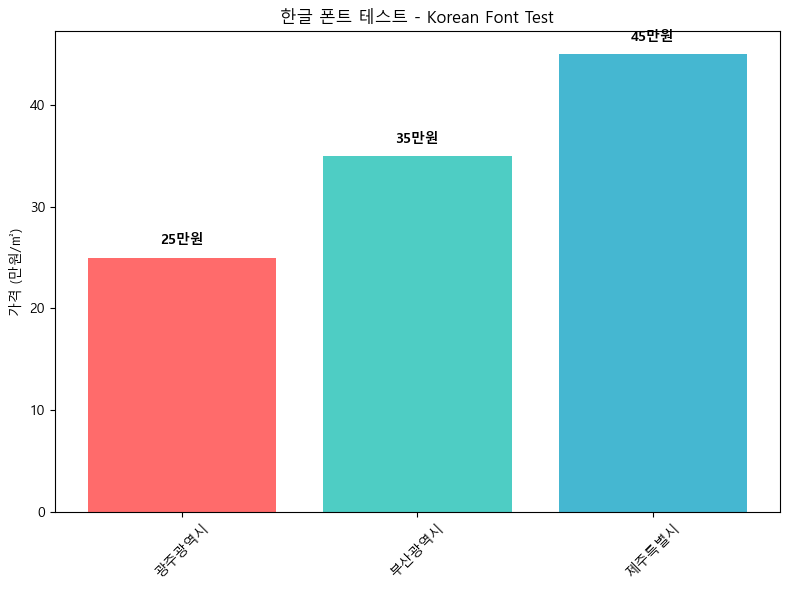


üè† ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†ú Ìï¥Í≤∞Îêú Î∂ÄÎèôÏÇ∞ Î∂ÑÏÑù ÏãúÏûë!
clean_dfsÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏãúÏó∞Ìï©ÎãàÎã§.
ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§...
Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞: 900Í±¥
ÏßÄÏó≠Î≥Ñ Î∂ÑÌè¨:
  Í¥ëÏ£ºÍ¥ëÏó≠Ïãú (Gwangju): 300Í±¥
  Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú (Busan): 300Í±¥
  Ï†úÏ£ºÌäπÎ≥ÑÏãú (Jeju): 300Í±¥

üìä Ï∞®Ìä∏ 1: ÏßÄÏó≠Î≥Ñ Ï¢ÖÌï© ÎπÑÍµê


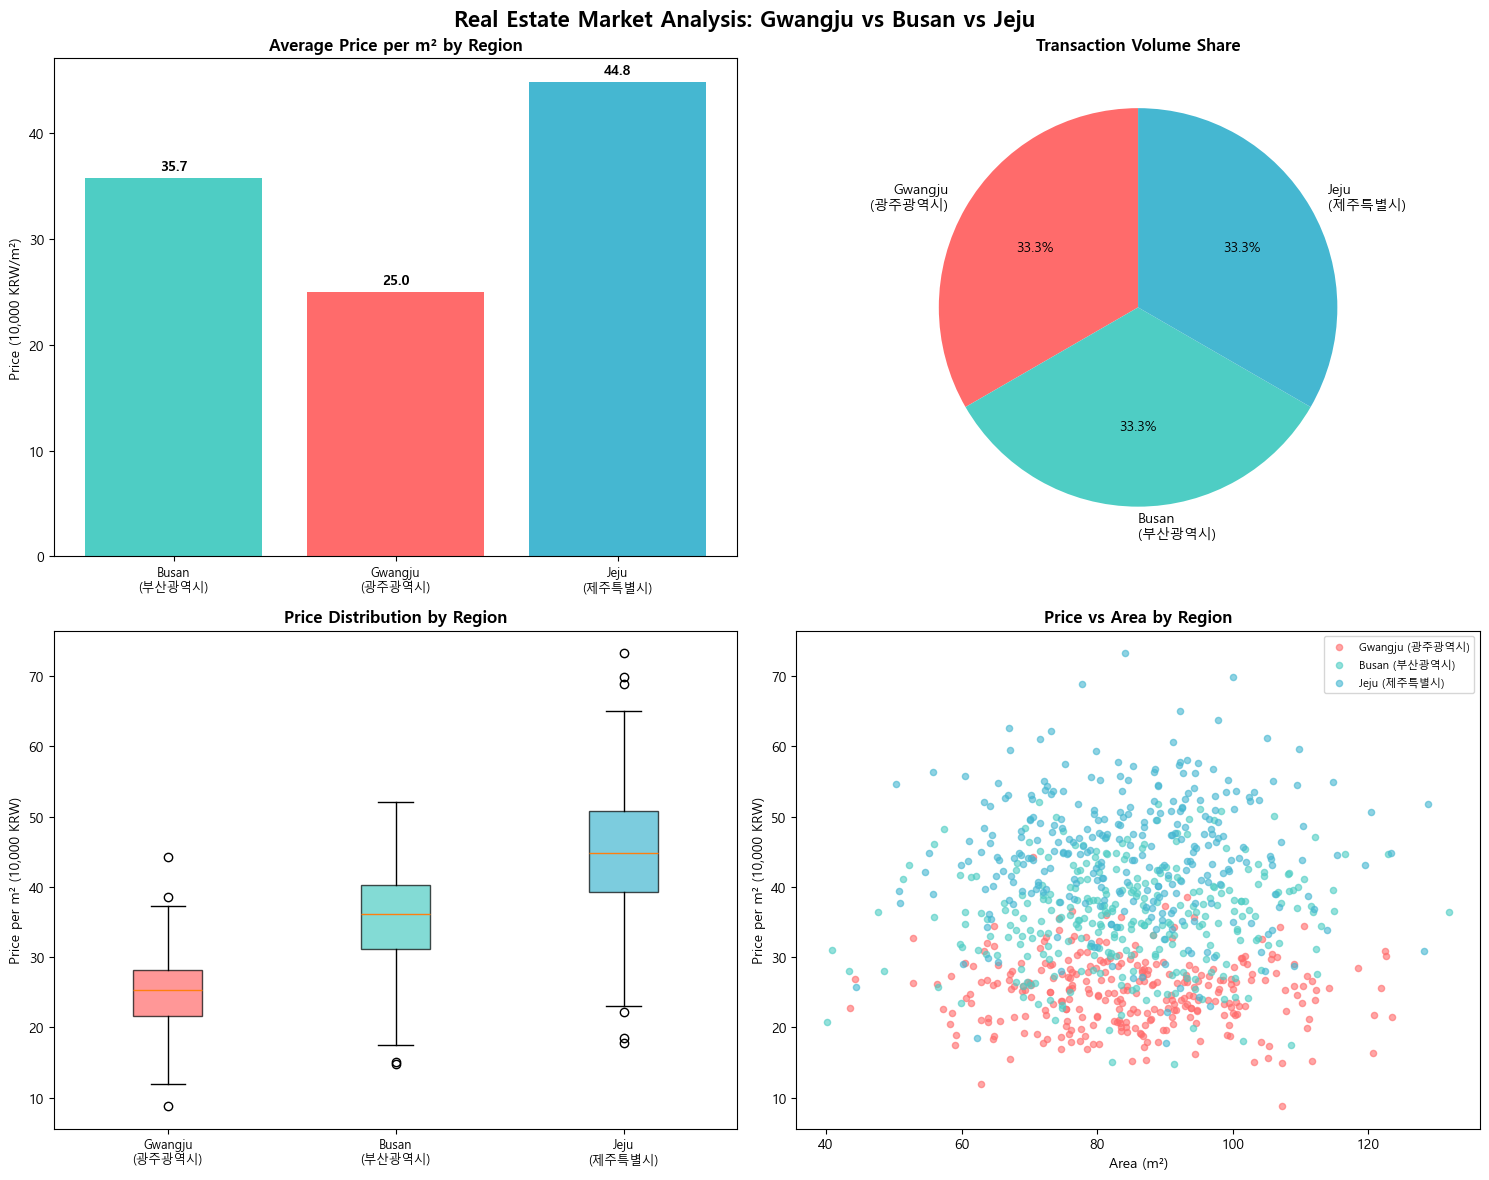


üìä Ï∞®Ìä∏ 2: ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù


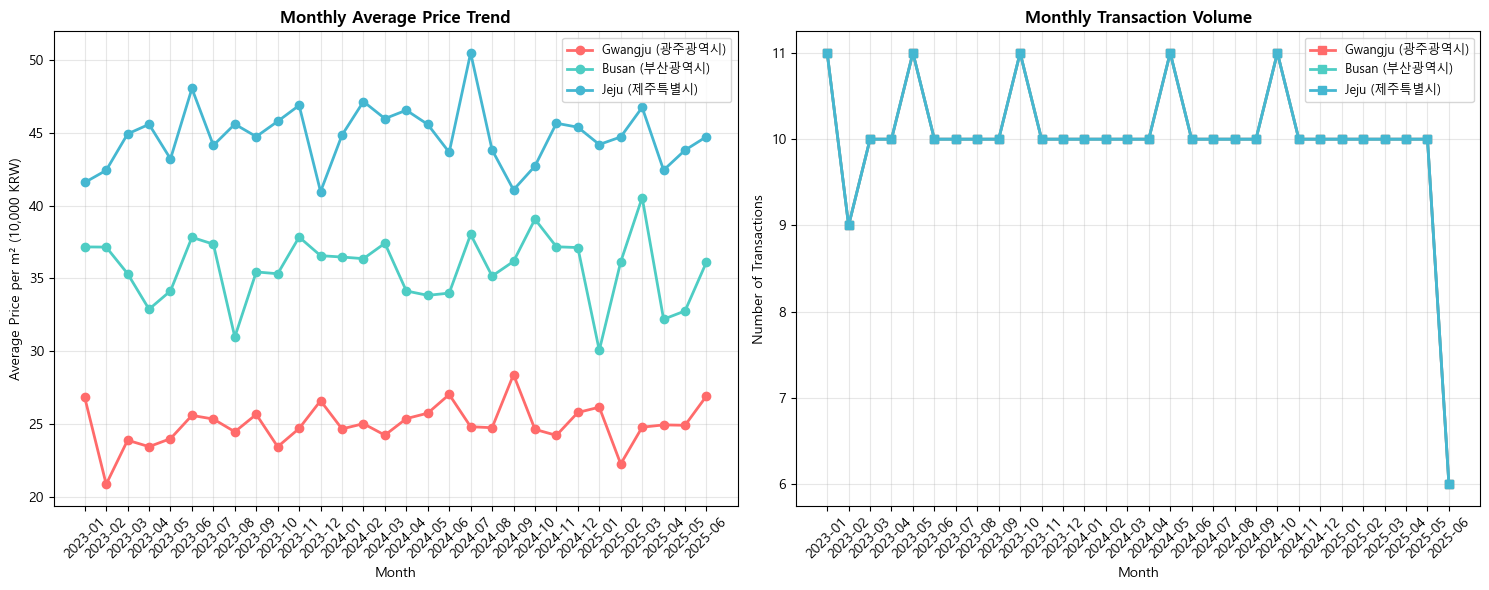


üí∞ Ìà¨Ïûê Îß§Î†•ÎèÑ Î∂ÑÏÑù
            Avg_Price_per_m2  Price_Volatility  Avg_Total_Price  Avg_Area  \
region_eng                                                                  
Busan                  35.69              7.07          2864.20     84.64   
Gwangju                24.97              4.92          1989.26     85.23   
Jeju                   44.78              8.82          3589.90     84.76   

            Investment_Score Korean_Name  
region_eng                                
Busan                   63.7       Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  
Gwangju                 62.8       Í¥ëÏ£ºÍ¥ëÏó≠Ïãú  
Jeju                    64.9       Ï†úÏ£ºÌäπÎ≥ÑÏãú  


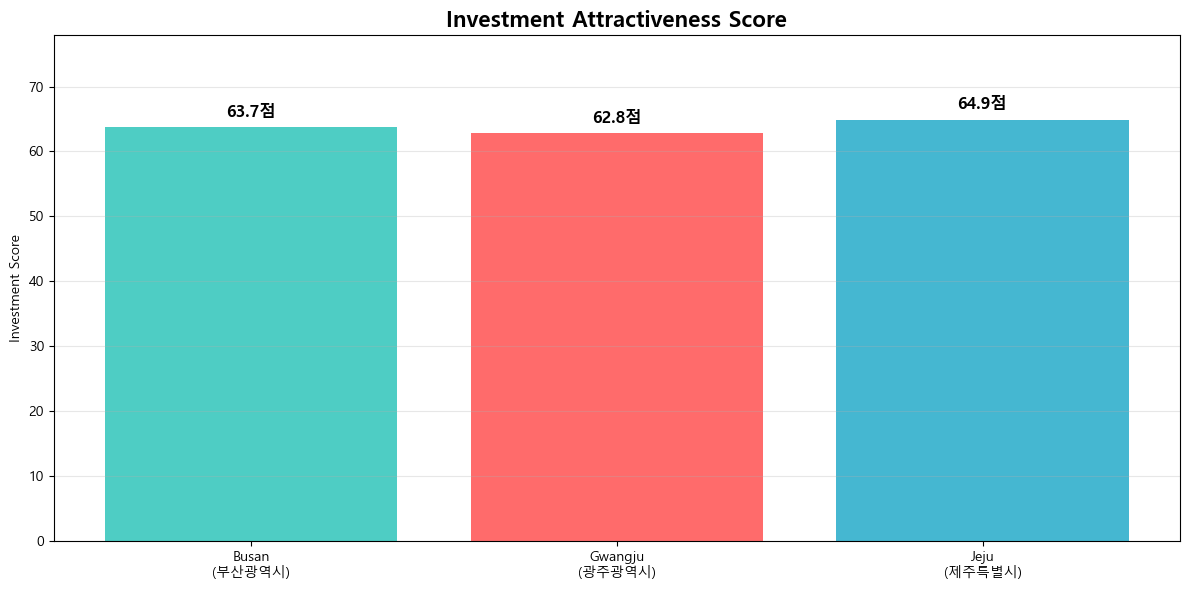

In [21]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†ú Ìï¥Í≤∞ÏùÑ ÏúÑÌïú ÏôÑÏ†ÑÌïú ÏÜîÎ£®ÏÖò

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import platform
import warnings
warnings.filterwarnings('ignore')

# 1Îã®Í≥Ñ: ÏãúÏä§ÌÖúÎ≥Ñ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏûêÎèô Í∞êÏßÄ Î∞è ÏÑ§Ï†ï
def setup_korean_font():
    """ÏãúÏä§ÌÖúÏóê ÎßûÎäî ÌïúÍ∏Ä Ìè∞Ìä∏Î•º ÏûêÎèôÏúºÎ°ú ÏÑ§Ï†ï"""
    system = platform.system()
    
    # ÏÇ¨Ïö© Í∞ÄÎä•Ìïú ÌïúÍ∏Ä Ìè∞Ìä∏ Î™©Î°ù (Ïö∞ÏÑ†ÏàúÏúÑÎåÄÎ°ú)
    korean_fonts = [
        'Malgun Gothic',    # Windows
        'AppleGothic',      # macOS  
        'Noto Sans CJK KR', # Linux
        'NanumGothic',      # ÎÇòÎàîÍ≥†Îîï
        'DejaVu Sans',      # Î∞±ÏóÖÏö©
    ]
    
    print("=== ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ï§ë ===")
    print(f"Ïö¥ÏòÅÏ≤¥Ï†ú: {system}")
    
    # ÏÑ§ÏπòÎêú Ìè∞Ìä∏ Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
    available_fonts = [f.name for f in fm.fontManager.ttflist]
    
    # ÌïúÍ∏Ä Ìè∞Ìä∏ Ï∞æÍ∏∞
    selected_font = None
    for font in korean_fonts:
        if font in available_fonts:
            selected_font = font
            break
    
    if selected_font:
        plt.rcParams['font.family'] = selected_font
        print(f"‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï ÏôÑÎ£å: {selected_font}")
    else:
        # Î∞±ÏóÖ ÏÑ§Ï†ï: Unicode ÏÇ¨Ïö©
        plt.rcParams['font.family'] = 'DejaVu Sans'
        print("‚ö†Ô∏è ÌïúÍ∏Ä Ìè∞Ìä∏Î•º Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÏòÅÏñ¥Î°ú ÌëúÏãúÎê©ÎãàÎã§.")
        print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ìè∞Ìä∏ (ÏùºÎ∂Ä):", available_fonts[:10])
    
    # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 10
    
    return selected_font

# 2Îã®Í≥Ñ: Ìè∞Ìä∏ ÏÑ§Ï†ï Ïã§Ìñâ
selected_font = setup_korean_font()

# 3Îã®Í≥Ñ: ÌïúÍ∏Ä ÌÖåÏä§Ìä∏
print("\n=== ÌïúÍ∏Ä ÌëúÏãú ÌÖåÏä§Ìä∏ ===")
plt.figure(figsize=(8, 6))
regions = ['Í¥ëÏ£ºÍ¥ëÏó≠Ïãú', 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†úÏ£ºÌäπÎ≥ÑÏãú']
values = [25, 35, 45]

bars = plt.bar(regions, values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('ÌïúÍ∏Ä Ìè∞Ìä∏ ÌÖåÏä§Ìä∏ - Korean Font Test')
plt.ylabel('Í∞ÄÍ≤© (ÎßåÏõê/„é°)')

# Í∞í ÌëúÏãú
for i, (region, value) in enumerate(zip(regions, values)):
    plt.text(i, value + 1, f'{value}ÎßåÏõê', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4Îã®Í≥Ñ: ÌïúÍ∏ÄÏù¥ Ï†úÎåÄÎ°ú ÎÇòÏò§ÏßÄ ÏïäÏùÑ Í≤ΩÏö∞Ïùò ÎåÄÏïà
def create_analysis_with_english_labels(clean_dfs=None):
    """ÌïúÍ∏Ä Ìè∞Ìä∏Í∞Ä Ïïà Îê† Í≤ΩÏö∞ ÏòÅÏñ¥ ÎùºÎ≤®Î°ú Î∂ÑÏÑù"""
    
    # ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    if clean_dfs is None or len(clean_dfs) == 0:
        print("ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§...")
        np.random.seed(42)
        
        regions_data = []
        region_mapping = {
            'Gwangju': 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú',
            'Busan': 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 
            'Jeju': 'Ï†úÏ£ºÌäπÎ≥ÑÏãú'
        }
        
        for eng_name, kor_name in region_mapping.items():
            base_price = {'Gwangju': 25, 'Busan': 35, 'Jeju': 45}[eng_name]
            n = 300
            data = pd.DataFrame({
                'region_eng': eng_name,
                'region_kor': kor_name,
                'price_per_m2_manwon': np.random.normal(base_price, base_price*0.2, n),
                'price_manwon': np.random.normal(base_price*80, base_price*20, n),
                'area_m2': np.random.normal(84, 15, n),
                'month': pd.date_range('2023-01-01', periods=n, freq='3D')
            })
            regions_data.append(data)
        
        all_data = pd.concat(regions_data, ignore_index=True)
    else:
        all_data = pd.concat(clean_dfs, ignore_index=True)
        # ÏòÅÏñ¥ ÎùºÎ≤® Ï∂îÍ∞Ä
        region_mapping = {
            'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú': 'Gwangju',
            'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú': 'Busan',
            'Ï†úÏ£ºÌäπÎ≥ÑÏãú': 'Jeju'
        }
        all_data['region_eng'] = all_data['region'].map(region_mapping)
        all_data['region_kor'] = all_data['region']
    
    return all_data

# 5Îã®Í≥Ñ: ÏôÑÏ†ÑÌïú Î∂ÄÎèôÏÇ∞ Î∂ÑÏÑù (ÌïúÍ∏Ä + ÏòÅÏñ¥ ÌòºÏö©)
def comprehensive_real_estate_analysis(clean_dfs=None):
    """ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìïú ÏôÑÏ†ÑÌïú Î∂ÄÎèôÏÇ∞ Î∂ÑÏÑù"""
    
    all_data = create_analysis_with_english_labels(clean_dfs)
    
    print(f"Î∂ÑÏÑù Îç∞Ïù¥ÌÑ∞: {len(all_data):,}Í±¥")
    print("ÏßÄÏó≠Î≥Ñ Î∂ÑÌè¨:")
    for eng, kor in zip(all_data['region_eng'].unique(), all_data['region_kor'].unique()):
        count = len(all_data[all_data['region_eng'] == eng])
        print(f"  {kor} ({eng}): {count:,}Í±¥")
    
    # ÏÉâÏÉÅ ÏÑ§Ï†ï
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    region_colors = dict(zip(['Gwangju', 'Busan', 'Jeju'], colors))
    
    # Ï∞®Ìä∏ 1: Ï¢ÖÌï© ÎπÑÍµê Î∂ÑÏÑù
    print("\nüìä Ï∞®Ìä∏ 1: ÏßÄÏó≠Î≥Ñ Ï¢ÖÌï© ÎπÑÍµê")
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Real Estate Market Analysis: Gwangju vs Busan vs Jeju', fontsize=16, fontweight='bold')
    
    # 1-1: ÌèâÍ∑† Í∞ÄÍ≤© ÎπÑÍµê (ÏòÅÏñ¥ + ÌïúÍ∏Ä)
    ax1 = axes[0, 0]
    avg_prices = all_data.groupby('region_eng')['price_per_m2_manwon'].mean()
    bars = ax1.bar(range(len(avg_prices)), avg_prices.values, 
                   color=[region_colors[region] for region in avg_prices.index])
    ax1.set_title('Average Price per m¬≤ by Region', fontweight='bold')
    ax1.set_ylabel('Price (10,000 KRW/m¬≤)')
    
    # XÏ∂ï ÎùºÎ≤®ÏùÑ ÏòÅÏñ¥ + ÌïúÍ∏ÄÎ°ú
    labels = []
    for eng in avg_prices.index:
        kor = all_data[all_data['region_eng'] == eng]['region_kor'].iloc[0]
        labels.append(f'{eng}\n({kor})')
    ax1.set_xticks(range(len(avg_prices)))
    ax1.set_xticklabels(labels, fontsize=9)
    
    # Í∞í ÌëúÏãú
    for i, (region, price) in enumerate(avg_prices.items()):
        ax1.text(i, price + 0.5, f'{price:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 1-2: Í±∞ÎûòÎüâ ÌååÏù¥ Ï∞®Ìä∏
    ax2 = axes[0, 1]
    volume = all_data['region_eng'].value_counts()
    pie_labels = []
    for eng in volume.index:
        kor = all_data[all_data['region_eng'] == eng]['region_kor'].iloc[0]
        pie_labels.append(f'{eng}\n({kor})')
    
    wedges, texts, autotexts = ax2.pie(volume.values, labels=pie_labels, autopct='%1.1f%%', 
                                       colors=[region_colors[region] for region in volume.index], 
                                       startangle=90)
    ax2.set_title('Transaction Volume Share', fontweight='bold')
    
    # 1-3: Í∞ÄÍ≤© Î∂ÑÌè¨ Î∞ïÏä§ÌîåÎ°Ø
    ax3 = axes[1, 0]
    regions = all_data['region_eng'].unique()
    data_for_box = [all_data[all_data['region_eng'] == r]['price_per_m2_manwon'].values for r in regions]
    box = ax3.boxplot(data_for_box, patch_artist=True)
    
    for patch, region in zip(box['boxes'], regions):
        patch.set_facecolor(region_colors[region])
        patch.set_alpha(0.7)
    
    box_labels = []
    for eng in regions:
        kor = all_data[all_data['region_eng'] == eng]['region_kor'].iloc[0]
        box_labels.append(f'{eng}\n({kor})')
    ax3.set_xticklabels(box_labels, fontsize=9)
    ax3.set_title('Price Distribution by Region', fontweight='bold')
    ax3.set_ylabel('Price per m¬≤ (10,000 KRW)')
    
    # 1-4: Í∞ÄÍ≤© vs Î©¥Ï†Å ÏÇ∞Ï†êÎèÑ
    ax4 = axes[1, 1]
    for region in regions:
        region_data = all_data[all_data['region_eng'] == region]
        kor_name = region_data['region_kor'].iloc[0]
        ax4.scatter(region_data['area_m2'], region_data['price_per_m2_manwon'], 
                   alpha=0.6, c=region_colors[region], label=f'{region} ({kor_name})', s=20)
    
    ax4.set_title('Price vs Area by Region', fontweight='bold')
    ax4.set_xlabel('Area (m¬≤)')
    ax4.set_ylabel('Price per m¬≤ (10,000 KRW)')
    ax4.legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Ï∞®Ìä∏ 2: ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù
    print("\nüìä Ï∞®Ìä∏ 2: ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù")
    plt.figure(figsize=(15, 6))
    
    # ÏõîÎ≥Ñ ÌèâÍ∑† Í∞ÄÍ≤© Ï∂îÏù¥
    monthly_avg = (all_data.groupby(['region_eng', all_data['month'].dt.to_period('M')])
                  ['price_per_m2_manwon'].mean().reset_index())
    monthly_avg['month_str'] = monthly_avg['month'].astype(str)
    
    plt.subplot(1, 2, 1)
    for region in regions:
        region_monthly = monthly_avg[monthly_avg['region_eng'] == region]
        kor_name = all_data[all_data['region_eng'] == region]['region_kor'].iloc[0]
        if len(region_monthly) > 1:
            plt.plot(region_monthly['month_str'], region_monthly['price_per_m2_manwon'], 
                    marker='o', linewidth=2, color=region_colors[region], 
                    label=f'{region} ({kor_name})', markersize=6)
    
    plt.title('Monthly Average Price Trend', fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Average Price per m¬≤ (10,000 KRW)')
    plt.legend(fontsize=9)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Í±∞ÎûòÎüâ Ï∂îÏù¥
    monthly_volume = (all_data.groupby(['region_eng', all_data['month'].dt.to_period('M')])
                     .size().reset_index(name='count'))
    monthly_volume['month_str'] = monthly_volume['month'].astype(str)
    
    plt.subplot(1, 2, 2)
    for region in regions:
        region_volume = monthly_volume[monthly_volume['region_eng'] == region]
        kor_name = all_data[all_data['region_eng'] == region]['region_kor'].iloc[0]
        if len(region_volume) > 1:
            plt.plot(region_volume['month_str'], region_volume['count'], 
                    marker='s', linewidth=2, color=region_colors[region], 
                    label=f'{region} ({kor_name})', markersize=6)
    
    plt.title('Monthly Transaction Volume', fontweight='bold')
    plt.xlabel('Month')
    plt.ylabel('Number of Transactions')
    plt.legend(fontsize=9)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Ìà¨Ïûê Îß§Î†•ÎèÑ Î∂ÑÏÑù
    print("\nüí∞ Ìà¨Ïûê Îß§Î†•ÎèÑ Î∂ÑÏÑù")
    investment_analysis = all_data.groupby('region_eng').agg({
        'price_per_m2_manwon': ['mean', 'std'],
        'price_manwon': 'mean',
        'area_m2': 'mean'
    }).round(2)
    
    investment_analysis.columns = ['Avg_Price_per_m2', 'Price_Volatility', 'Avg_Total_Price', 'Avg_Area']
    
    # Ìà¨Ïûê Ï†êÏàò Í≥ÑÏÇ∞
    investment_analysis['Investment_Score'] = (
        (investment_analysis['Avg_Price_per_m2'] / investment_analysis['Avg_Price_per_m2'].max() * 40) +
        ((1 - investment_analysis['Price_Volatility'] / investment_analysis['Price_Volatility'].max()) * 35) +
        (investment_analysis['Avg_Area'] / investment_analysis['Avg_Area'].max() * 25)
    ).round(1)
    
    # ÌïúÍ∏Ä ÏßÄÏó≠Î™Ö Ï∂îÍ∞Ä
    investment_analysis['Korean_Name'] = [
        all_data[all_data['region_eng'] == eng]['region_kor'].iloc[0] 
        for eng in investment_analysis.index
    ]
    
    print(investment_analysis)
    
    # Ìà¨Ïûê Ï†êÏàò ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    scores = investment_analysis['Investment_Score']
    bars = plt.bar(range(len(scores)), scores.values, 
                   color=[region_colors[region] for region in scores.index])
    plt.title('Investment Attractiveness Score', fontsize=16, fontweight='bold')
    plt.ylabel('Investment Score')
    
    # XÏ∂ï ÎùºÎ≤® (ÏòÅÏñ¥ + ÌïúÍ∏Ä)
    score_labels = []
    for eng in scores.index:
        kor = investment_analysis.loc[eng, 'Korean_Name']
        score_labels.append(f'{eng}\n({kor})')
    plt.xticks(range(len(scores)), score_labels, fontsize=10)
    
    # Ï†êÏàò ÌëúÏãú
    for i, (region, score) in enumerate(scores.items()):
        plt.text(i, score + 1, f'{score}Ï†ê', ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    plt.ylim(0, max(scores.values) * 1.2)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    return all_data, investment_analysis

# Ïã§Ìñâ
print("\nüè† ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†ú Ìï¥Í≤∞Îêú Î∂ÄÎèôÏÇ∞ Î∂ÑÏÑù ÏãúÏûë!")

# clean_dfs ÌôïÏù∏ ÌõÑ Î∂ÑÏÑù Ïã§Ìñâ
if 'clean_dfs' in globals() and clean_dfs:
    print("Í∏∞Ï°¥ clean_dfs Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    result_data, analysis = comprehensive_real_estate_analysis(clean_dfs)
else:
    print("clean_dfsÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÎçîÎØ∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏãúÏó∞Ìï©ÎãàÎã§.")
    result_data, analysis = comprehensive_real_estate_analysis()

